### Comparison of the GOES/XRS responses used in sswidl 
From the older CHIANTI v9 with wrong factors in GOES13/15 short
https://hesperia.gsfc.nasa.gov/ssw/gen/idl/synoptic/goes/goes_chianti_resp_20200812.fits

And the newer CHIANTI v10 which should be correct 
https://hesperia.gsfc.nasa.gov/ssw/gen/idl/synoptic/goes/goes_chianti_response_latest.fits 
 
* 24-05-2022 IGH

In [1]:
from astropy.io import fits
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import goesxrs_temp as gtem

import warnings
warnings.simplefilter('ignore')
# Just setup plot fonts
plt.rcParams.update({'font.size': 18,'font.family':"sans-serif",\
                         'font.sans-serif':"Arial",'mathtext.default':"regular"})

---
For GOES 15 should be minimal change for long (only from CHIANT v9 to v10) but more for short (as also removal of wrong factor)

Is the same for GOES 13 and 14

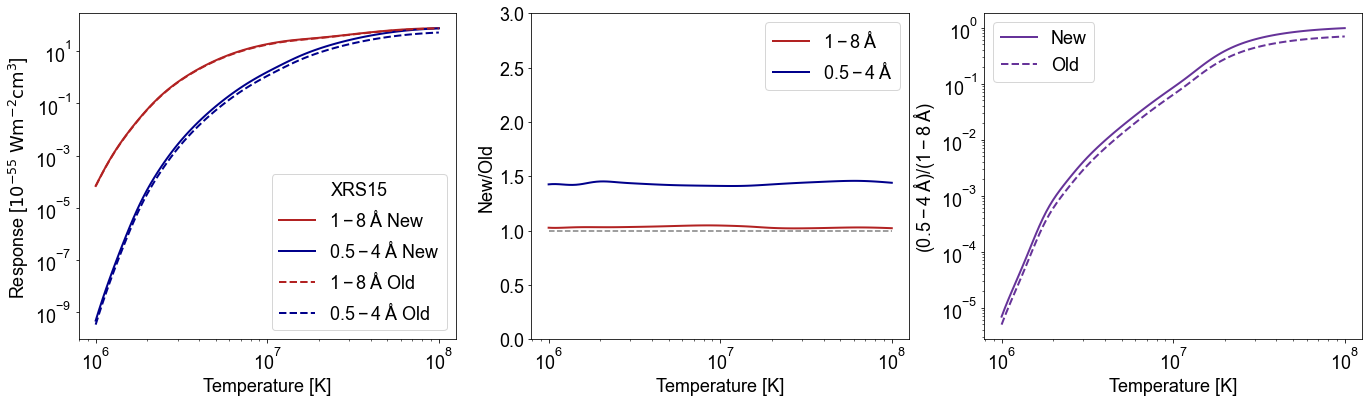

In [2]:
# Load in responses for GOES 15
sat=15
resps_old, resptmk_old = gtem.get_resps(sat=sat,old_ver=True)
resps, resptmk = gtem.get_resps(sat=sat)

# Plot them to see what they look like:
fig= plt.figure(figsize=(23, 6))

ax1 = fig.add_subplot(1, 3, 1)
plt.plot(1e6*resptmk,resps[:,0],marker=None,color='firebrick',lw=2,label='$1-8\;\AA$ New')
plt.plot(1e6*resptmk,resps[:,1],marker=None,color='darkblue',lw=2,label='$0.5-4\;\AA$ New')
plt.plot(1e6*resptmk_old,resps_old[:,0],marker=None,ls='--',color='firebrick',lw=2,label='$1-8\;\AA$ Old')
plt.plot(1e6*resptmk_old,resps_old[:,1],marker=None,ls='--',color='darkblue',lw=2,label='$0.5-4\;\AA$ Old')
ax1.set_ylabel("Response [$\mathrm{10^{-55}\;Wm^{-2}cm^{3}}$]")
ax1.set_xlabel("Temperature [K]")
ax1.set_xscale("log")
ax1.set_yscale("log")
plt.legend(title='XRS{:.0f}'.format(sat))

ax2 = fig.add_subplot(1, 3, 2)
plt.plot(1e6*resptmk,resps[:,0]/resps_old[:,0],marker=None,color='firebrick',lw=2,label='$1-8\;\AA$')
plt.plot(1e6*resptmk,resps[:,1]/resps_old[:,1],marker=None,color='darkblue',lw=2,label='$0.5-4\;\AA$')
plt.plot([1e6*np.min(resptmk),1e6*np.max(resptmk)],[1,1],'--',color='grey')
plt.ylim([0,3])
ax2.set_ylabel("New/Old")
ax2.set_xlabel("Temperature [K]")
ax2.set_xscale("log")
ax2.set_yscale("linear")
plt.legend()


ax3 = fig.add_subplot(1, 3, 3)
plt.plot(1e6*resptmk,resps[:,1]/resps[:,0],marker=None,color='rebeccapurple',lw=2,label='New')
plt.plot(1e6*resptmk,resps_old[:,1]/resps_old[:,0],marker=None,color='rebeccapurple',ls='--',lw=2,label='Old')
ax3.set_ylabel("$(0.5-4\;\AA)$/$(1-8\;\AA)$")
ax3.set_xlabel("Temperature [K]")
ax3.set_xscale("log")
ax3.set_yscale("log")
plt.legend()
plt.show()

---
For GOES 16 should be minimal change - only from CHIANT v9 to v10

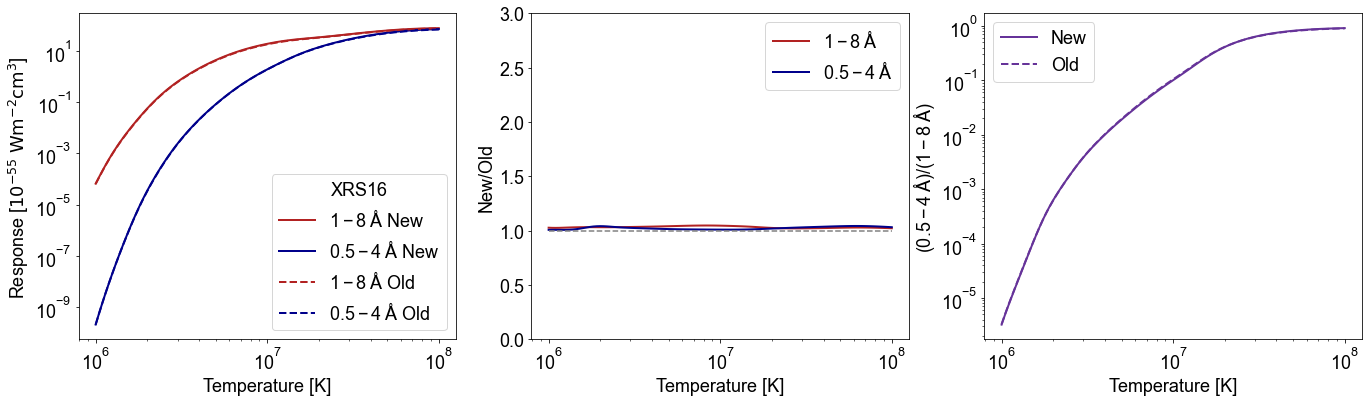

In [3]:
# Load in responses for GOES 16
sat=16
resps_old, resptmk_old = gtem.get_resps(sat=sat,old_ver=True)
resps, resptmk = gtem.get_resps(sat=sat)

# Plot them to see what they look like:
fig= plt.figure(figsize=(23, 6))

ax1 = fig.add_subplot(1, 3, 1)
plt.plot(1e6*resptmk,resps[:,0],marker=None,color='firebrick',lw=2,label='$1-8\;\AA$ New')
plt.plot(1e6*resptmk,resps[:,1],marker=None,color='darkblue',lw=2,label='$0.5-4\;\AA$ New')
plt.plot(1e6*resptmk_old,resps_old[:,0],marker=None,ls='--',color='firebrick',lw=2,label='$1-8\;\AA$ Old')
plt.plot(1e6*resptmk_old,resps_old[:,1],marker=None,ls='--',color='darkblue',lw=2,label='$0.5-4\;\AA$ Old')
ax1.set_ylabel("Response [$\mathrm{10^{-55}\;Wm^{-2}cm^{3}}$]")
ax1.set_xlabel("Temperature [K]")
ax1.set_xscale("log")
ax1.set_yscale("log")
plt.legend(title='XRS{:.0f}'.format(sat))

ax2 = fig.add_subplot(1, 3, 2)
plt.plot(1e6*resptmk,resps[:,0]/resps_old[:,0],marker=None,color='firebrick',lw=2,label='$1-8\;\AA$')
plt.plot(1e6*resptmk,resps[:,1]/resps_old[:,1],marker=None,color='darkblue',lw=2,label='$0.5-4\;\AA$')
plt.plot([1e6*np.min(resptmk),1e6*np.max(resptmk)],[1,1],'--',color='grey')
plt.ylim([0,3])
ax2.set_ylabel("New/Old")
ax2.set_xlabel("Temperature [K]")
ax2.set_xscale("log")
ax2.set_yscale("linear")
plt.legend()


ax3 = fig.add_subplot(1, 3, 3)
plt.plot(1e6*resptmk,resps[:,1]/resps[:,0],marker=None,color='rebeccapurple',lw=2,label='New')
plt.plot(1e6*resptmk,resps_old[:,1]/resps_old[:,0],marker=None,color='rebeccapurple',ls='--',lw=2,label='Old')
ax3.set_ylabel("$(0.5-4\;\AA)$/$(1-8\;\AA)$")
ax3.set_xlabel("Temperature [K]")
ax3.set_xscale("log")
ax3.set_yscale("log")
plt.legend()
plt.show()

---
For GOES 12 should be minimal change - only from CHIANT v9 to v10

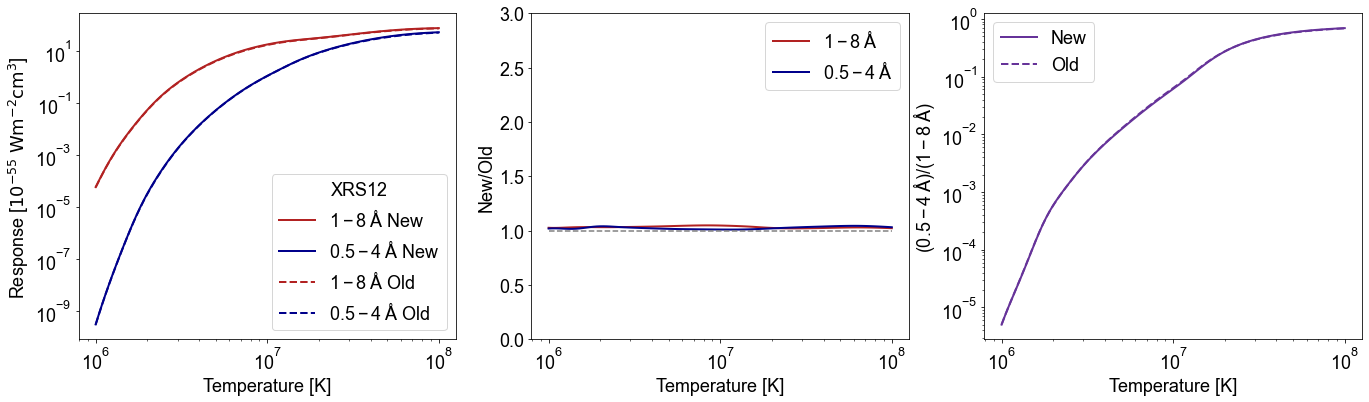

In [4]:
# Load in responses for GOES 12
sat=12
resps_old, resptmk_old = gtem.get_resps(sat=sat,old_ver=True)
resps, resptmk = gtem.get_resps(sat=sat)

# Plot them to see what they look like:
fig= plt.figure(figsize=(23, 6))

ax1 = fig.add_subplot(1, 3, 1)
plt.plot(1e6*resptmk,resps[:,0],marker=None,color='firebrick',lw=2,label='$1-8\;\AA$ New')
plt.plot(1e6*resptmk,resps[:,1],marker=None,color='darkblue',lw=2,label='$0.5-4\;\AA$ New')
plt.plot(1e6*resptmk_old,resps_old[:,0],marker=None,ls='--',color='firebrick',lw=2,label='$1-8\;\AA$ Old')
plt.plot(1e6*resptmk_old,resps_old[:,1],marker=None,ls='--',color='darkblue',lw=2,label='$0.5-4\;\AA$ Old')
ax1.set_ylabel("Response [$\mathrm{10^{-55}\;Wm^{-2}cm^{3}}$]")
ax1.set_xlabel("Temperature [K]")
ax1.set_xscale("log")
ax1.set_yscale("log")
plt.legend(title='XRS{:.0f}'.format(sat))

ax2 = fig.add_subplot(1, 3, 2)
plt.plot(1e6*resptmk,resps[:,0]/resps_old[:,0],marker=None,color='firebrick',lw=2,label='$1-8\;\AA$')
plt.plot(1e6*resptmk,resps[:,1]/resps_old[:,1],marker=None,color='darkblue',lw=2,label='$0.5-4\;\AA$')
plt.plot([1e6*np.min(resptmk),1e6*np.max(resptmk)],[1,1],'--',color='grey')
plt.ylim([0,3])
ax2.set_ylabel("New/Old")
ax2.set_xlabel("Temperature [K]")
ax2.set_xscale("log")
ax2.set_yscale("linear")
plt.legend()


ax3 = fig.add_subplot(1, 3, 3)
plt.plot(1e6*resptmk,resps[:,1]/resps[:,0],marker=None,color='rebeccapurple',lw=2,label='New')
plt.plot(1e6*resptmk,resps_old[:,1]/resps_old[:,0],marker=None,color='rebeccapurple',ls='--',lw=2,label='Old')
ax3.set_ylabel("$(0.5-4\;\AA)$/$(1-8\;\AA)$")
ax3.set_xlabel("Temperature [K]")
ax3.set_xscale("log")
ax3.set_yscale("log")
plt.legend()
plt.show()

In [5]:
# What does this mean for the T, EM?
# Just choose some value of the short and long channel flux and loop over the sat number
for sat in range(11,18):
    print("Sat{0:.0f}".format(sat))
    tmko, emo=gtem.get_tem(5e-5,1e-5,sat=sat,old_ver=True)
    print("Old{0:.0f}: {1:.2f}MK, {2:.2e}cm^-3$".format(sat,tmko,emo))
    tmk, em=gtem.get_tem(5e-5,1e-5,sat=sat)
    print("New{0:.0f}: {1:.2f}MK, {2:.2e}cm^-3$".format(sat,tmk,em))


Sat11
Old11: 16.73MK, 1.76e+49cm^-3$
New11: 16.86MK, 1.69e+49cm^-3$
Sat12
Old12: 16.71MK, 1.76e+49cm^-3$
New12: 16.85MK, 1.70e+49cm^-3$
Sat13
Old13: 16.73MK, 1.76e+49cm^-3$
New13: 14.26MK, 1.96e+49cm^-3$
Sat14
Old14: 16.73MK, 1.76e+49cm^-3$
New14: 14.50MK, 1.87e+49cm^-3$
Sat15
Old15: 16.72MK, 1.74e+49cm^-3$
New15: 14.49MK, 1.84e+49cm^-3$
Sat16
Old16: 13.50MK, 2.03e+49cm^-3$
New16: 13.67MK, 1.93e+49cm^-3$
Sat17
Old17: 13.61MK, 1.99e+49cm^-3$
New17: 13.79MK, 1.90e+49cm^-3$
